In [1]:
import sys
sys.path.insert(1, '../../ana_tools')
import getters, tools, graphic_tools, setters
import matplotlib.pyplot as plt
plt.style.use('../../ana_tools/presentation.mplstyle')
import numpy as np
path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
plateaus = getters.get_plateaus()
colors = {"Wav1-1":"blue", "Wav1-2":"orange", "Wav1-3":"red", "Wav1-4":"green",
          "Wav2-1":"yellow", "Wav2-2":"black", "Wav2-3":"grey", "Wav2-4":"purple", "Wav2-5":"darkred"}

/afs/cern.ch/user/j/jcapotor/FBG_TMS
/afs/cern.ch/user/j/jcapotor/FBG_TMS/ana_tools/plateaus.json


Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [06:43<00:00, 17.55s/it]


273_down
253_down
233_down
213_down
233_up
253_up
273_up
Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [03:46<00:00,  9.83s/it]


273_down
253_down
233_down
213_down
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:13<00:00,  1.01it/s]


253_down
213_down
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [05:38<00:00,  5.37s/it]


293_down
283_down
273_down
263_down
253_down
243_down
233_down
223_down
213_down
223_up
233_up
243_up
253_up
263_up
273_up


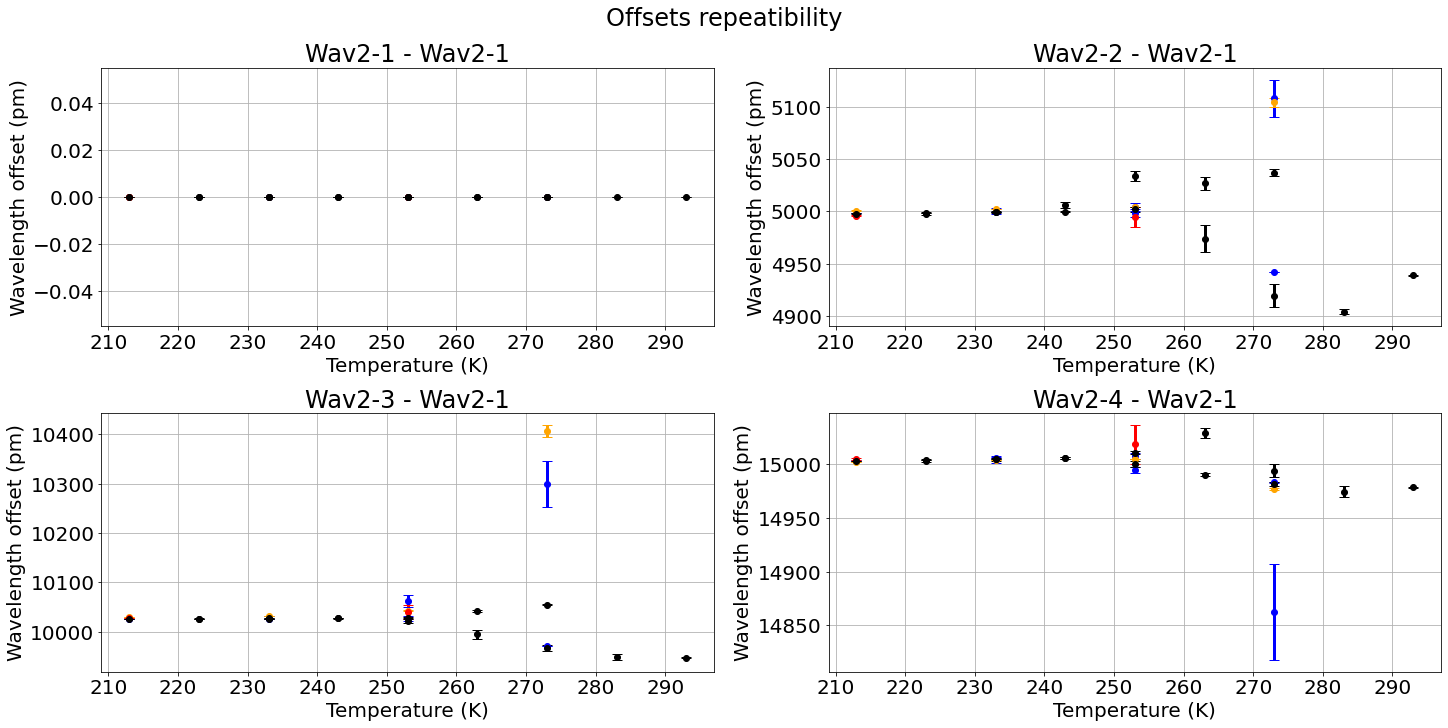

In [7]:
dates = ["20230221", "20230222", "20230223", "20230224"]
colors = {"20230221":"blue", "20230222":"orange", "20230223":"red", "20230224":"black"}
fig, axes = graphic_tools.make_figure(ncols=2, nrows=2)
fig.set_size_inches(20, 10)
fig.suptitle("Offsets repeatibility")
for date in dates:
    peaks = getters.get_raw_data(path_to_split=path+date+"/", filetype="peaks", pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
    for plateau in plateaus[date]:
        print(plateau)
        cnt = 0
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        pcut = peaks.loc[(peaks["Timestamp"]>t0) & (peaks["Timestamp"]<tf)].reset_index(drop=True)
        for sens in peaks.columns:
            if sens == "Timestamp" or sens[3]=="1":
                continue
            axes[cnt].errorbar(int(plateau.split("_")[0]),
                             1e12*np.mean(pcut[sens]-pcut["Wav2-1"]),
                               fmt="o",
                               yerr=1e12*np.std(pcut[sens]-pcut["Wav2-1"]),
                               capsize=5,
                             color=colors[date])
            axes[cnt].set_title(sens + " - Wav2-1")
            axes[cnt].set_xlabel("Temperature (K)")
            axes[cnt].set_ylabel("Wavelength offset (pm)")
            cnt += 1